<a href="https://colab.research.google.com/github/STYLO009/ANN_projects/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,41.0,160.0,145.0,136.0,236.0,6.36,8.18,29.6,Type 2,1.0
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,55.0,50.0,30.0,93.0,150.0,2.00,5.63,23.0,No Diabetes,0.0
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,66.0,99.0,36.0,118.0,195.0,5.07,7.51,44.7,Type 2,1.0
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,50.0,79.0,140.0,139.0,253.0,5.28,9.03,38.2,Type 2,1.0
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,52.0,125.0,160.0,137.0,184.0,12.74,7.20,23.5,Type 2,1.0


In [4]:
df.shape

(80291, 31)

In [5]:
df.value_counts()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80291 entries, 0 to 80290
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   age                                 80291 non-null  int64  
 1   gender                              80291 non-null  object 
 2   ethnicity                           80291 non-null  object 
 3   education_level                     80291 non-null  object 
 4   income_level                        80291 non-null  object 
 5   employment_status                   80291 non-null  object 
 6   smoking_status                      80291 non-null  object 
 7   alcohol_consumption_per_week        80291 non-null  int64  
 8   physical_activity_minutes_per_week  80291 non-null  int64  
 9   diet_score                          80290 non-null  float64
 10  sleep_hours_per_day                 80290 non-null  float64
 11  screen_time_hours_per_day           80290

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,family_history_diabetes,hypertension_history,cardiovascular_history,bmi,...,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diagnosed_diabetes
count,80291.000000,80291.000000,80291.000000,80290.000000,80290.000000,80290.000000,80290.000000,80290.000000,80290.000000,80290.00000,...,80290.000000,80290.000000,80290.000000,80290.000000,80290.000000,80290.000000,80290.000000,80290.000000,80290.000000,80290.000000
mean,50.126266,2.002740,119.042147,5.995067,6.996876,5.992563,0.218807,0.250542,0.079375,25.61666,...,185.961477,54.057043,102.950069,121.449396,111.121858,159.970208,9.053989,6.519782,30.208377,0.599228
std,15.610088,1.415874,84.554986,1.782713,1.095289,2.464835,0.413440,0.433328,0.270324,3.59559,...,31.930328,10.240042,33.329988,43.342165,13.595012,30.970842,4.959813,0.814925,9.053366,0.490058
min,18.000000,0.000000,0.000000,0.000000,3.000000,0.500000,0.000000,0.000000,0.000000,15.00000,...,100.000000,20.000000,50.000000,30.000000,60.000000,70.000000,2.000000,4.000000,2.700000,0.000000
25%,39.000000,1.000000,57.000000,4.800000,6.300000,4.300000,0.000000,0.000000,0.000000,23.20000,...,164.000000,47.000000,78.000000,91.000000,102.000000,139.000000,5.070000,5.970000,23.800000,0.000000
50%,50.000000,2.000000,100.000000,6.000000,7.000000,6.000000,0.000000,0.000000,0.000000,25.60000,...,186.000000,54.000000,102.000000,121.000000,111.000000,160.000000,8.780000,6.520000,29.000000,1.000000
75%,61.000000,3.000000,161.000000,7.200000,7.700000,7.700000,0.000000,1.000000,0.000000,28.00000,...,207.000000,61.000000,126.000000,151.000000,120.000000,181.000000,12.440000,7.070000,35.600000,1.000000
max,90.000000,10.000000,833.000000,10.000000,10.000000,16.800000,1.000000,1.000000,1.000000,39.10000,...,308.000000,98.000000,246.000000,344.000000,172.000000,287.000000,29.820000,9.800000,67.200000,1.000000


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.isnull().sum()

,0
age,0
gender,0
ethnicity,0
education_level,0
income_level,0
employment_status,0
smoking_status,0
alcohol_consumption_per_week,0
physical_activity_minutes_per_week,0
diet_score,1


In [16]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

In [17]:
df_dummy = pd.get_dummies(df, drop_first=True)

In [18]:
bool_columns = df_dummy.select_dtypes(include='bool').columns
df_dummy[bool_columns] = df_dummy[bool_columns].astype(int)

In [19]:
final = df_dummy

In [20]:
final.dtypes

,0
age,int64
alcohol_consumption_per_week,int64
physical_activity_minutes_per_week,int64
diet_score,float64
sleep_hours_per_day,float64
screen_time_hours_per_day,float64
family_history_diabetes,float64
hypertension_history,float64
cardiovascular_history,float64
bmi,float64


In [24]:
X = final.drop(['diabetes_stage_Type 1','diabetes_stage_Type 2'],axis=1)
y = final['diabetes_stage_Type 1']

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(random_state=42)
}

results = {}

for name, model in models.items():
    print(f"\n--- Training {name} ---")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    results[name] = {
        "accuracy": accuracy,
        "report": report,
        "confusion_matrix": cm
    }

    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(report)
    print("Confusion Matrix:")
    print(cm)

print("\n--- Summary of Results ---")
for name, metrics in results.items():
    print(f"{name}: Accuracy = {metrics['accuracy']:.4f}")


--- Training Logistic Regression ---
Accuracy: 0.9988
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16039
           1       0.00      0.00      0.00        19

    accuracy                           1.00     16058
   macro avg       0.50      0.50      0.50     16058
weighted avg       1.00      1.00      1.00     16058

Confusion Matrix:
[[16039     0]
 [   19     0]]

--- Training Decision Tree ---
Accuracy: 0.9978
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16039
           1       0.17      0.21      0.19        19

    accuracy                           1.00     16058
   macro avg       0.58      0.60      0.59     16058
weighted avg       1.00      1.00      1.00     16058

Confusion Matrix:
[[16019    20]
 [   15     4]]

--- Training Random Forest ---
Accuracy: 0.9988
Classification Report:
              precision   

In [36]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_p = final.drop(['diabetes_stage_Type 1','diabetes_stage_Type 2'],axis=1)
y_p = final['diabetes_stage_Type 1']

X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_p,y_p,random_state= 42,test_size=0.2)

per = Perceptron(random_state=42)
per.fit(X_train_a,y_train_a)

y_pred = per.predict(X_test_a)

accuracy = accuracy_score(y_test_a, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9988


In [37]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import Perceptron
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import to_categorical


In [39]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [41]:
tf.keras.backend.clear_session()

num_classes = y_train_cat.shape[1]
model_dl = Sequential([
    Dense(16,input_dim=X_train.shape[1],activation='relu'),
    Dense(8,activation='leaky_relu'),
    Dense(num_classes,activation='softmax')
])

In [42]:
model_dl.compile(optimizer='adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [43]:
history = model_dl.fit(X_train,y_train_cat,epochs=100,batch_size=32,validation_split=0.2,verbose=1)

Epoch 1/100
1606/1606 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9107 - loss: 1.7879 - val_accuracy: 0.9988 - val_loss: 0.0121
Epoch 2/100
1606/1606 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9988 - loss: 0.0116 - val_accuracy: 0.9989 - val_loss: 0.0092
Epoch 3/100
1606/1606 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9986 - loss: 0.0108 - val_accuracy: 0.9989 - val_loss: 0.0091
Epoch 4/100
1606/1606 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9986 - loss: 0.0098 - val_accuracy: 0.9989 - val_loss: 0.0089
Epoch 5/100
1606/1606 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9989 - loss: 0.0081 - val_accuracy: 0.9989 - val_loss: 0.0080
Epoch 6/100
1606/1606 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9989 - loss: 0.0085 - val_accuracy: 0.9989 - val_loss: 0.0080
Epoch 7/100
1606/1606 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9988 - loss: 0.0088 - val_accuracy: 0.9989 - val_loss: 0.0081
Epoch 8/100
1606/1606 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9987 - loss: 0

In [44]:
loss,accuracy = model_dl.evaluate(X_test,y_test_cat,verbose=1)
print("Accuracy","-"*20,'>',accuracy)

502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9984 - loss: 0.0089
Accuracy -------------------- > 0.9988167881965637


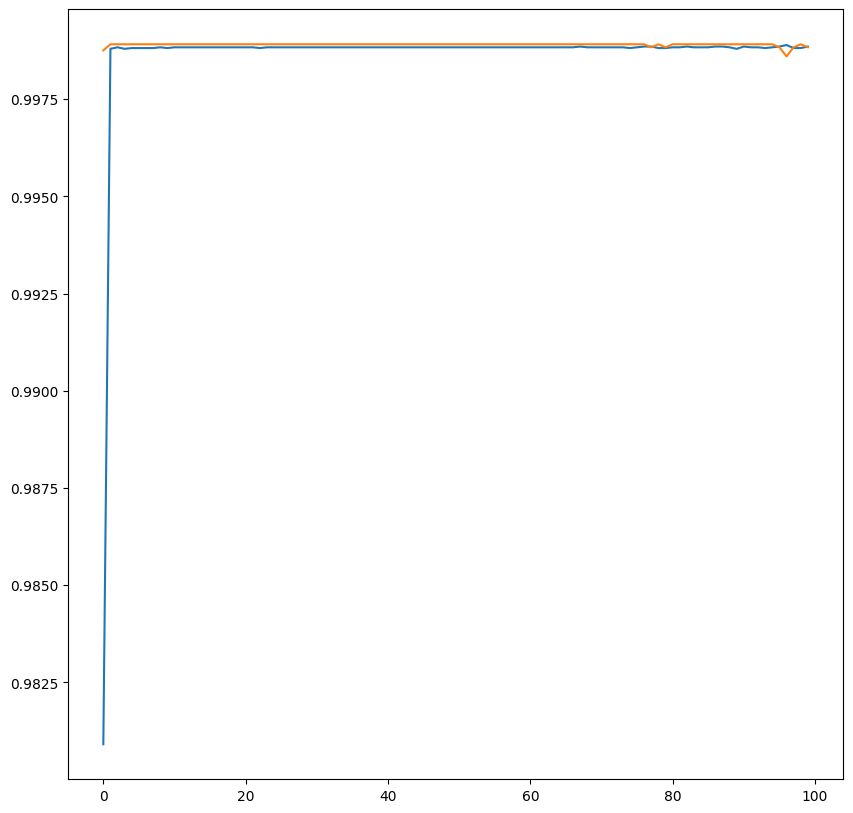

In [45]:
plt.figure(figsize=(10,10))
plt.plot(history.history['accuracy'],label='train Acc')
plt.plot(history.history['val_accuracy'],label='val Acc')